# Code Written by:
**Shweta Tiwari**
*20 Oct 2023*

## Algorithm:  Floyd Warshall

In [1]:
import time

In [2]:
from itertools import product
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Algorithm

In [3]:
%%time
def floyd(graph):
    # initialize matrix
    distance = nx.adjacency_matrix(graph).todense().astype(float)
    distance[distance == 0] = np.inf
    np.fill_diagonal(distance, 0)

    # find shortest paths
    for k, i, j in product(range(len(graph)), repeat=3):
        distance[i, j] = min(distance[i, j], distance[i, k] + distance[k, j])

        # negative cycle detection
        if i == j and distance[i, j] < 0:
            return k, i, 'negative cycle detected'

    # shortest paths
    return {
        (i, j): distance[i, j]
        for i, j in product(range(len(graph)), repeat=2)
        if i != j and not np.isinf(distance[i, j])
    }

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


## Graph

In [4]:
%%time
def generate_graph(n, edge_prob=.5, pos_weight_prob=.2):
    graph = nx.DiGraph()
    graph.add_nodes_from(range(n))

    for u, v in product(range(n), repeat=2):
        if u != v and np.random.rand() < edge_prob:
            weight = [-1, 1][np.random.rand() < pos_weight_prob]
            graph.add_edge(u, v, weight=weight)

    return graph

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


In [5]:
%%time
def draw_graph(graph):
    cm = {-1: 'red', 1: 'black'}
    colors = [cm[e['weight']]  for (u, v, e) in graph.edges(data=True)]

    plt.figure(figsize=(8, 8))
    plt.axis('off')

    layout = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=520)
    nx.draw_networkx_edges(graph, layout, edge_color=colors)
    nx.draw_networkx_labels(graph, layout, font_color='white')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


# Run

CPU times: user 87 ms, sys: 44.1 ms, total: 131 ms
Wall time: 148 ms


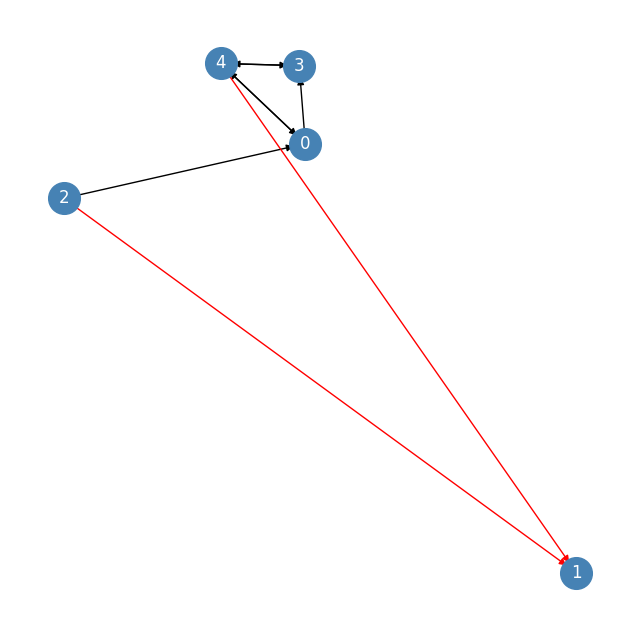

In [6]:
%%time
graph = generate_graph(5, edge_prob=.4, pos_weight_prob=.7)
draw_graph(graph)

In [7]:
%%time
floyd(graph)

CPU times: user 77.7 ms, sys: 57.5 ms, total: 135 ms
Wall time: 86.9 ms


{(0, 1): 0.0,
 (0, 3): 1.0,
 (0, 4): 1.0,
 (2, 0): 1.0,
 (2, 1): -1.0,
 (2, 3): 2.0,
 (2, 4): 2.0,
 (3, 0): 2.0,
 (3, 1): 0.0,
 (3, 4): 1.0,
 (4, 0): 1.0,
 (4, 1): -1.0,
 (4, 3): 1.0}

CPU times: user 70.7 ms, sys: 47.1 ms, total: 118 ms
Wall time: 72 ms


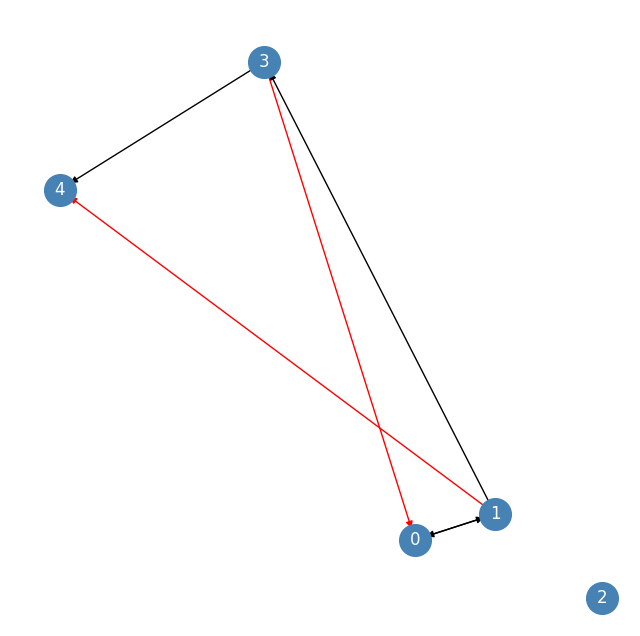

In [8]:
%%time
graph = generate_graph(5, edge_prob=.4, pos_weight_prob=.6)
draw_graph(graph)

In [9]:
%%time
floyd(graph)

CPU times: user 887 µs, sys: 0 ns, total: 887 µs
Wall time: 898 µs


{(0, 1): 1.0,
 (0, 3): 2.0,
 (0, 4): 0.0,
 (1, 0): 0.0,
 (1, 3): 1.0,
 (1, 4): -1.0,
 (3, 0): -1.0,
 (3, 1): 0.0,
 (3, 4): -1.0}

# The End